<a href="https://colab.research.google.com/github/antonellafontanetto/Achivos_Extras/blob/main/Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: importar librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# prompt: cargar dataset csv

import pandas as pd
df = pd.read_csv('/content/prod_encoded_df (2).csv')
df.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,555.0,18699.0,2021.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,472.0,14314.0,2021.0,2.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1082.0,19413.0,2021.0,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,678.0,20456.0,2021.0,4.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2594.0,25454.0,2021.0,5.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

# Suponiendo que queremos predecir 'Produccion de Petroleo'
X = df.drop(['Produccion de Petroleo', 'Produccion de Gas'], axis=1)
y = df['Produccion de Petroleo']

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir la red neuronal
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # salida continua
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2956675840.0000 - mae: 11104.6387 - val_loss: 2279098880.0000 - val_mae: 9855.4941
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 3010766848.0000 - mae: 11489.1348 - val_loss: 2278252544.0000 - val_mae: 9855.5303
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3222352384.0000 - mae: 12142.9141 - val_loss: 2275352576.0000 - val_mae: 9853.3604
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3256838144.0000 - mae: 12543.6650 - val_loss: 2268017152.0000 - val_mae: 9845.8848
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2766608640.0000 - mae: 10679.4785 - val_loss: 2254246912.0000 - val_mae: 9839.0029
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3161106944.0000 - mae: 11824.1074 - val_loss: 2232856576.0000 - val_mae: 9845.2461
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3251777024.0000 - mae: 12807.8828 - val_loss: 2203740416.0000 - val_mae: 9888.8750
Epoch 8/50
65/65 ━━━━━━

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Leer el CSV
df = pd.read_csv("prod_encoded_df (2).csv")

# Features y targets
X = df.drop(['Produccion de Petroleo', 'Produccion de Gas'], axis=1)
y_petroleo = df['Produccion de Petroleo']
y_gas = df['Produccion de Gas']

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train_pet, y_test_pet = train_test_split(X_scaled, y_petroleo, test_size=0.2, random_state=42)
_, _, y_train_gas, y_test_gas = train_test_split(X_scaled, y_gas, test_size=0.2, random_state=42)

# Modelo para petróleo
model_pet = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_pet.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_pet.fit(X_train, y_train_pet, epochs=50, batch_size=32, validation_split=0.2,
              callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

# Modelo para gas
model_gas = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_gas.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_gas.fit(X_train, y_train_gas, epochs=50, batch_size=32, validation_split=0.2,
              callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

# Evaluación
mae_pet = model_pet.evaluate(X_test, y_test_pet, verbose=0)[1]
mae_gas = model_gas.evaluate(X_test, y_test_gas, verbose=0)[1]

print(f"MAE Producción Petróleo: {mae_pet:.2f}")
print(f"MAE Producción Gas: {mae_gas:.2f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2819455488.0000 - mae: 10624.3389 - val_loss: 2279084800.0000 - val_mae: 9855.4014
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3471664128.0000 - mae: 12246.3271 - val_loss: 2278063872.0000 - val_mae: 9855.2285
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3639837952.0000 - mae: 13487.6211 - val_loss: 2274893568.0000 - val_mae: 9852.2334
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3083210240.0000 - mae: 12012.8037 - val_loss: 2267402496.0000 - val_mae: 9844.6514
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3844120832.0000 - mae: 13723.6396 - val_loss: 2253704704.0000 - val_mae: 9839.9746
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3394522368.0000 - mae: 12973.7861 - val_loss: 2231912704.0000 - val_mae: 9847.7100
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3157671424.0000 - mae: 12685.3184 - val_loss: 2202655232.0000 - val_mae: 9896.2207
Epoch 8/50
65/65 ━━━━━━━

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 942019968.0000 - mae: 10341.3242 - val_loss: 1012227584.0000 - val_mae: 10865.1240
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1132874880.0000 - mae: 12005.2480 - val_loss: 1011256128.0000 - val_mae: 10861.2676
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1069722368.0000 - mae: 11555.3926 - val_loss: 1008098816.0000 - val_mae: 10852.8086
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 992820224.0000 - mae: 10527.9795 - val_loss: 1001020864.0000 - val_mae: 10840.5000
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1027238336.0000 - mae: 11133.2637 - val_loss: 988041536.0000 - val_mae: 10819.9824
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1057267712.0000 - mae: 11609.9170 - val_loss: 968234752.0000 - val_mae: 10796.2803
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1049440896.0000 - mae: 11669.7148 - val_loss: 940641088.0000 - val_mae: 10769.5137
Epoch 8/50
65/65 ━━━━━

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import joblib

# Leer datos
df = pd.read_csv("prod_encoded_df (2).csv")

# Separar variables
X = df.drop(['Produccion de Petroleo', 'Produccion de Gas'], axis=1)
y_petroleo = df['Produccion de Petroleo']
y_gas = df['Produccion de Gas']

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Guardar el escalador
joblib.dump(scaler, "scaler.save")

# Dividir
X_train, X_test, y_train_pet, y_test_pet = train_test_split(X_scaled, y_petroleo, test_size=0.2, random_state=42)
_, _, y_train_gas, y_test_gas = train_test_split(X_scaled, y_gas, test_size=0.2, random_state=42)

# Modelo para petróleo
model_pet = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_pet.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_pet.fit(X_train, y_train_pet, epochs=50, batch_size=32, validation_split=0.2,
              callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

# Modelo para gas
model_gas = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model_gas.compile(optimizer='adam', loss='mse', metrics=['mae'])
model_gas.fit(X_train, y_train_gas, epochs=50, batch_size=32, validation_split=0.2,
              callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

# Guardar modelos
model_pet.save("modelo_petroleo.h5")
model_gas.save("modelo_gas.h5")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2980464384.0000 - mae: 11748.3984 - val_loss: 2279010304.0000 - val_mae: 9855.6465
Epoch 2/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3313150464.0000 - mae: 12289.6572 - val_loss: 2277812224.0000 - val_mae: 9855.7119
Epoch 3/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3186608384.0000 - mae: 11661.2852 - val_loss: 2273281280.0000 - val_mae: 9852.5762
Epoch 4/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3317143552.0000 - mae: 12412.1084 - val_loss: 2263397120.0000 - val_mae: 9845.9434
Epoch 5/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3504573184.0000 - mae: 12846.7393 - val_loss: 2244597504.0000 - val_mae: 9845.9102
Epoch 6/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3108955136.0000 - mae: 12146.7666 - val_loss: 2217356288.0000 - val_mae: 9869.2324
Epoch 7/50
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3515087872.0000 - mae: 13148.8408 - val_loss: 2176755712.0000 - val_mae: 9952.6270
Epoch 8/50
65/65 ━━━━━━━

### Gráfico: Reales vs Predichos

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


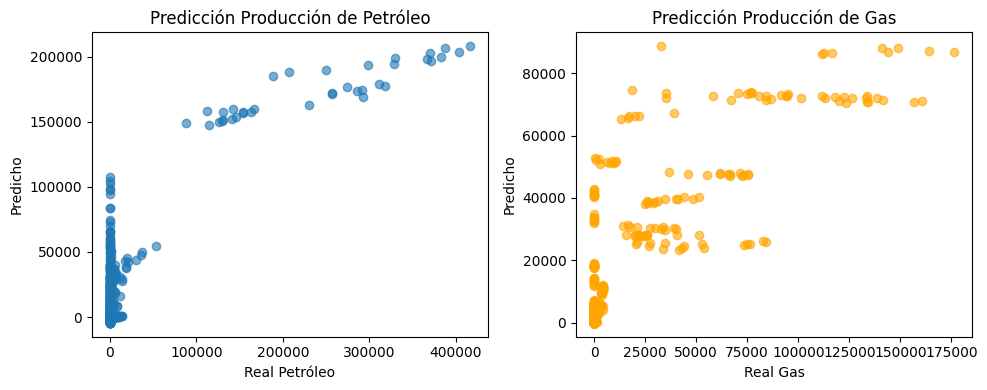

In [6]:
# Predicciones
y_pred_pet = model_pet.predict(X_test).flatten()
y_pred_gas = model_gas.predict(X_test).flatten()

# Gráfico petróleo
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_test_pet, y_pred_pet, alpha=0.6)
plt.xlabel("Real Petróleo")
plt.ylabel("Predicho")
plt.title("Predicción Producción de Petróleo")

# Gráfico gas
plt.subplot(1, 2, 2)
plt.scatter(y_test_gas, y_pred_gas, alpha=0.6, color='orange')
plt.xlabel("Real Gas")
plt.ylabel("Predicho")
plt.title("Predicción Producción de Gas")
plt.tight_layout()
plt.show()


### Predicción de un mes futuro (Ej: Julio 2025)

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

# Cargar sin compilar y luego compilar manualmente
model_pet = load_model("modelo_petroleo.h5", compile=False)
model_pet.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

model_gas = load_model("modelo_gas.h5", compile=False)
model_gas.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

scaler = joblib.load("scaler.save")

# Crear input con estructura exacta (debe tener las 43 columnas)
nuevo_mes = pd.DataFrame([{
    # ejemplo: activás la zona LOMA CAMPANA, pozo petrolífero, recurso no convencional, etc.
    'Tipo de pozo_Gasífero': 0,
    'Tipo de pozo_Inyección de Agua': 0,
    'Tipo de pozo_Otro tipo': 0,
    'Tipo de pozo_Petrolífero': 1,
    'Tipo de pozo_Sumidero': 0,
    'Tipo de recurso_NO CONVENCIONAL': 1,
    'Subtipo de recurso_SHALE': 1,
    'Subtipo de recurso_TIGHT': 0,
    'Area de permiso de concesion_LOMA CAMPANA': 1,
    # el resto en 0 (podés usar un dict y completarlo con 0)
    'Año': 2025,
    'Mes': 7,
    # ... agregás el resto con 0
}], columns=X.columns).fillna(0)

# Escalado y predicción
nuevo_mes_scaled = scaler.transform(nuevo_mes)
pred_pet = model_pet.predict(nuevo_mes_scaled)[0][0]
pred_gas = model_gas.predict(nuevo_mes_scaled)[0][0]

print(f"Predicción Julio 2025:")
print(f" - Petróleo: {pred_pet:.2f} m³")
print(f" - Gas: {pred_gas:.2f} Mm³")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Predicción Julio 2025:
 - Petróleo: 214118.91 m³
 - Gas: 47220.60 Mm³


✅ 1. Crear registros mensuales desde hoy (ej. julio 2025) hasta diciembre 2030
✅ 2. Simular un escenario base con una configuración típica (por ejemplo: Loma Campana, pozo petrolífero, shale)
✅ 3. Predecir cada mes usando los modelos entrenados
✅ 4. Graficar la evolución mensual de ambas producciones

In [11]:
fila_df = fila_df[X.columns]  # Reordenar columnas


🧠 Supuestos para la simulación
Área: LOMA CAMPANA

Tipo de pozo: Petrolífero

Recurso: No convencional - Shale

El resto de las áreas y tipos: en 0

Solo varía el mes y el año entre julio 2025 y diciembre 2030

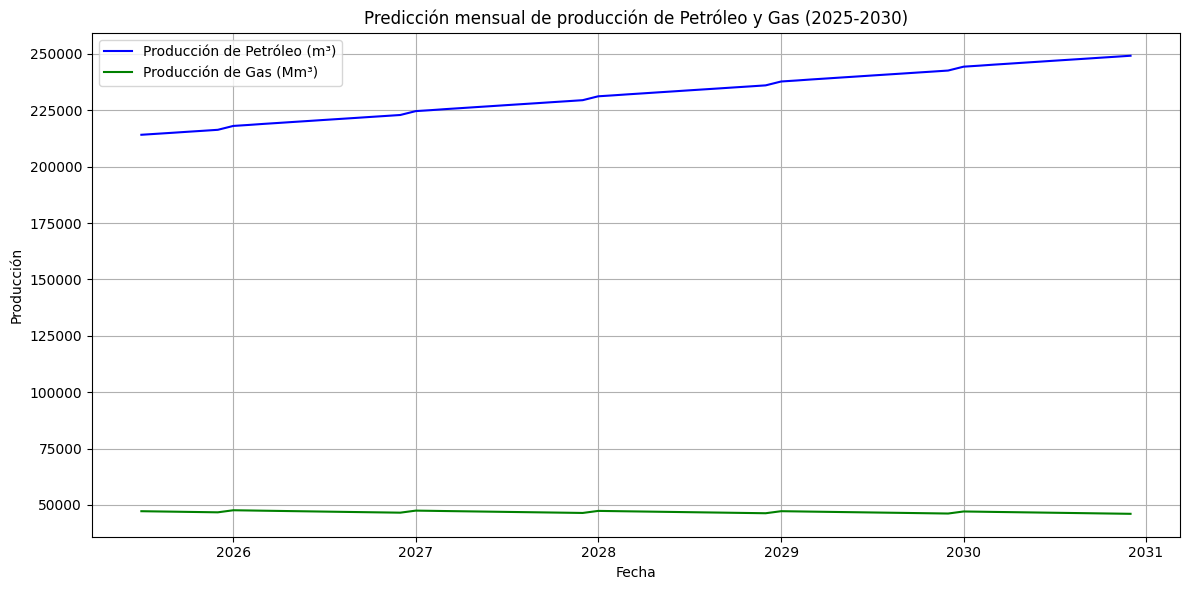

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import joblib

from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

# Cargar sin compilar y luego compilar manualmente
model_pet = load_model("modelo_petroleo.h5", compile=False)
model_pet.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

model_gas = load_model("modelo_gas.h5", compile=False)
model_gas.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

scaler = joblib.load("scaler.save")

# Base del input
plantilla = pd.DataFrame(columns=X.columns)

# Configuración constante
template_base = {
    'Tipo de pozo_Gasífero': 0,
    'Tipo de pozo_Inyección de Agua': 0,
    'Tipo de pozo_Otro tipo': 0,
    'Tipo de pozo_Petrolífero': 1,
    'Tipo de pozo_Sumidero': 0,
    'Tipo de recurso_NO CONVENCIONAL': 1,
    'Subtipo de recurso_SHALE': 1,
    'Subtipo de recurso_TIGHT': 0,
    'Area de permiso de concesion_LOMA CAMPANA': 1
}

# Completar el resto de columnas en 0 si no están en template_base
for col in X.columns:
    if col not in template_base:
        template_base[col] = 0

# Crear fechas mensuales hasta dic 2030
fechas = pd.date_range(start="2025-07-01", end="2030-12-01", freq='MS')
resultados = []

for fecha in fechas:
    fila = template_base.copy()
    fila['Año'] = fecha.year
    fila['Mes'] = fecha.month
    fila_df = pd.DataFrame([fila])

    # Reordenar columnas exactamente como en X
    fila_df = fila_df[X.columns]

    fila_scaled = scaler.transform(fila_df)

    pred_pet = model_pet.predict(fila_scaled, verbose=0)[0][0]
    pred_gas = model_gas.predict(fila_scaled, verbose=0)[0][0]

    resultados.append({
        'Fecha': fecha,
        'Pred_Petroleo': pred_pet,
        'Pred_Gas': pred_gas
    })

# Convertir resultados a DataFrame
df_pred = pd.DataFrame(resultados)

# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df_pred['Fecha'], df_pred['Pred_Petroleo'], label='Producción de Petróleo (m³)', color='blue')
plt.plot(df_pred['Fecha'], df_pred['Pred_Gas'], label='Producción de Gas (Mm³)', color='green')
plt.title("Predicción mensual de producción de Petróleo y Gas (2025-2030)")
plt.xlabel("Fecha")
plt.ylabel("Producción")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


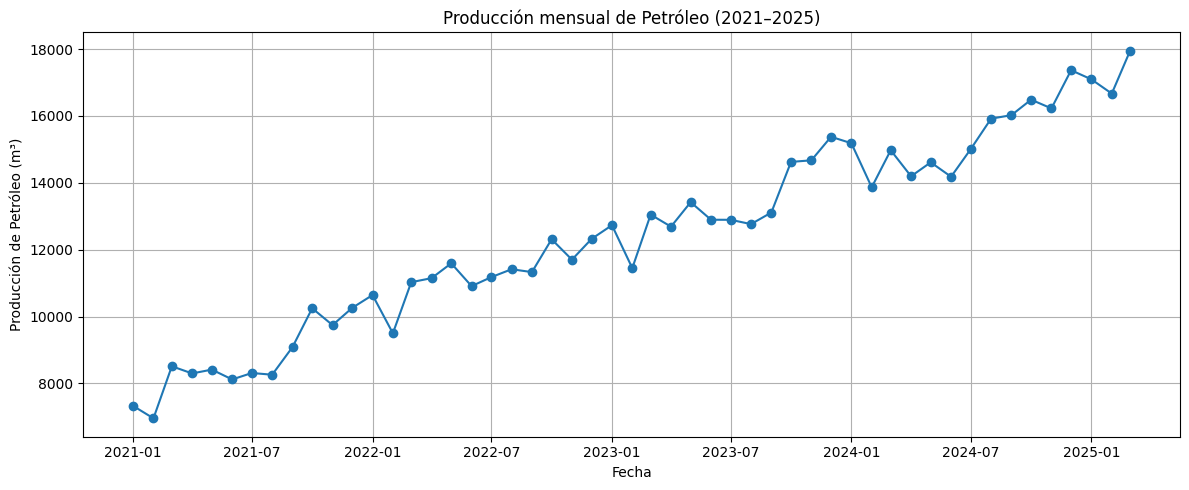

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar tus datos
df = pd.read_csv("prod_encoded_df (2).csv")

# Preparar datos para serie temporal
df_lstm = df[['Año', 'Mes', 'Produccion de Petroleo']].copy()
df_lstm['Fecha'] = pd.to_datetime(df_lstm['Año'].astype(int).astype(str) + '-' + df_lstm['Mes'].astype(int).astype(str) + '-01')
df_lstm = df_lstm.groupby('Fecha').mean().sort_index().reset_index()

# Graficar
plt.figure(figsize=(12, 5))
plt.plot(df_lstm['Fecha'], df_lstm['Produccion de Petroleo'], marker='o')
plt.title("Producción mensual de Petróleo (2021–2025)")
plt.xlabel("Fecha")
plt.ylabel("Producción de Petróleo (m³)")
plt.grid(True)
plt.tight_layout()
plt.show()
